# Statistical Inference on PM2.5 Concentrations in China from 2013 to 2015

## Authors: Tsun Li Nicholas Tam, Camila Dall Bello, Leon Zhang

## Group: 46

## 1. Introduction
### 1.1. Background Information
For years, substantial parts of China have suffered from chronic air pollution. The main pollutants are PM2.5, referring to tiny particles in the air with aerodynamic diameters of $2.5$ micrometers ($2.5 \mu m$) or less. PM2.5 consists of a complex mixture of solids and aerosols, with particles containing various organic and inorganic compounds. (Inhalable Particulate Matter and Health (PM2.5 and PM10)) 

The presence of high concentrations of PM2.5 in China has negatively influenced climate, visibility, and human health. In 2013, in an attempt to reduce air pollution, the Chinese government issued the 2013-2017 Clear Air Action Plan, aiming to significantly reduce concentrations of PM2.5 in China by 2017. (Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E., 2015)

### 1.2. Dataset and Project Question
For our research project, we have selected datasets of hourly observations of PM2.5 concentrations in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang, along with other meteorological data for each city,from 1-1-2013 to 12-31-2015. These datasets were retrieved from the [PM2.5 Data of Five Chinese Cities Data Set](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) from UCI machine learning repository, and converted from a singular RAR file to CSV files online. 

Our project question is: 
#### "Given the sample data for cities in China, is there a significant decrease in PM2.5 concentration in the cities in China between 2013 and 2015?" 

Given the project question, let $\mu_{2013}$ and $\mu_{2015}$ be the mean PM2.5 concentration in 2013 and 2015 respectively, and let $\sigma_{2013}$ and $\sigma_{2015}$ be the standard deviation of the PM2.5 concentration in 2013 and 2015 respectively, with all values measured in $g/m^3$. The following hypothesis tests will be conducted: 

Hypothesis test 1:
- $H_0: \mu_{2013} = \mu_{2015}$ 
- $H_1: \mu_{2013} > \mu_{2015}$

Hypothesis test 2:
- $H_0: \sigma_{2013} = \sigma_{2015}$ 
- $H_1: \sigma_{2013} \neq \sigma_{2015}$ 

The differences in standard deviation for each location are tested to inform us of whether or not comparing the differences in means for each location is a reliable method for our investigation. For instance, if there is a significant difference in both the mean and standard deviation of PM2.5 concentrations, then the comparison of PM2.5 concentrations may be difficult due to differing distributions of data.

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [1]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
# library(digest) 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merge them into a single dataframe called `total_PM2.5_AV`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing cities in China.
- The measurements in each of the original datasets contain values for PM2.5 concentrations in 3 separate locations within each city. For the sake of simplicity, the values have been averaged together into a single column, `PM_2.5_AV`, for each city.

In [2]:
# Preparing URLs
beijing_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/BeijingPM20100101_20151231.csv")
shanghai_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShanghaiPM20100101_20151231.csv")
chengdu_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ChengduPM20100101_20151231.csv")
guangzhou_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/GuangzhouPM20100101_20151231.csv")
shenyang_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShenyangPM20100101_20151231.csv")

# Preparing datasets
beijing_PM2.5_AV <- beijing_PM2.5 %>% 
    filter(!is.na(PM_Dongsi), !is.na(PM_Dongsihuan), !is.na(PM_Nongzhanguan)) %>% 
    mutate(PM_2.5_AV = (PM_Dongsi + PM_Dongsihuan + PM_Nongzhanguan) / 3) %>% 
    mutate(location = "Beijing") %>% 
    select(location, year, PM_2.5_AV) 
# head(beijing_PM2.5_AV)

shanghai_PM2.5_AV <- shanghai_PM2.5 %>% 
    filter(!is.na(PM_Jingan), !is.na(PM_US.Post), !is.na(PM_Xuhui)) %>% 
    mutate(PM_2.5_AV = (PM_Jingan + PM_US.Post + PM_Xuhui) / 3) %>% 
    mutate(location = "Shanghai") %>% 
    select(location, year, PM_2.5_AV)
# head(shanghai_PM2.5_AV)

chengdu_PM2.5_AV <- chengdu_PM2.5 %>% 
    filter(!is.na(PM_Caotangsi), !is.na(PM_Shahepu), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_Caotangsi + PM_Shahepu + PM_US.Post) / 3) %>% 
    mutate(location = "Chengdu") %>% 
    select(location, year, PM_2.5_AV)
# head(chengdu_PM2.5_AV)

guangzhou_PM2.5_AV <- guangzhou_PM2.5 %>% 
    filter(!is.na(PM_City.Station), !is.na(PM_5th.Middle.School), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_City.Station + PM_5th.Middle.School + PM_US.Post) / 3) %>% 
    mutate(location = "Guangzhou") %>% 
    select(location, year, PM_2.5_AV)
# head(guangzhou_PM2.5_AV)

shenyang_PM2.5_AV <- shenyang_PM2.5 %>% 
    filter(!is.na(PM_Taiyuanjie), !is.na(PM_US.Post), !is.na(PM_Xiaoheyan)) %>% 
    mutate(PM_2.5_AV = (PM_Taiyuanjie + PM_US.Post + PM_Xiaoheyan) / 3) %>% 
    mutate(location = "Shenyang") %>% 
    select(location, year, PM_2.5_AV)
# head(shenyang_PM2.5_AV)

# Merging datasets
total_PM2.5_AV <- rbind(beijing_PM2.5_AV, shanghai_PM2.5_AV, chengdu_PM2.5_AV, guangzhou_PM2.5_AV, shenyang_PM2.5_AV) 

head(total_PM2.5_AV)

,location,year,PM_2.5_AV
,<chr>,<int>,<dbl>
1,Beijing,2013,141.0000
2,Beijing,2013,149.3333
3,Beijing,2013,147.3333
4,Beijing,2013,118.0000
5,Beijing,2013,113.6667
6,Beijing,2013,173.3333


_Table 1: Initial dataset for all required data_

### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of PM 2.5 concentrations
- Histograms have been selected to display the sampling distribution of PM 2.5 concentrations in each city for 2013 and 2015, to allow easier observation of spread and centre of data.
- Outlier values that exceed $250 \mu g/m^3$ have been omitted to allow a clearer display of the sample distribution.
- The majority of the distributions are skewed to the right.
- The distributions for Beijing in 2013 and Guangzhou in 2015 are multimodal, while the remaining distributions are unimodal.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Removed 768 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 599 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


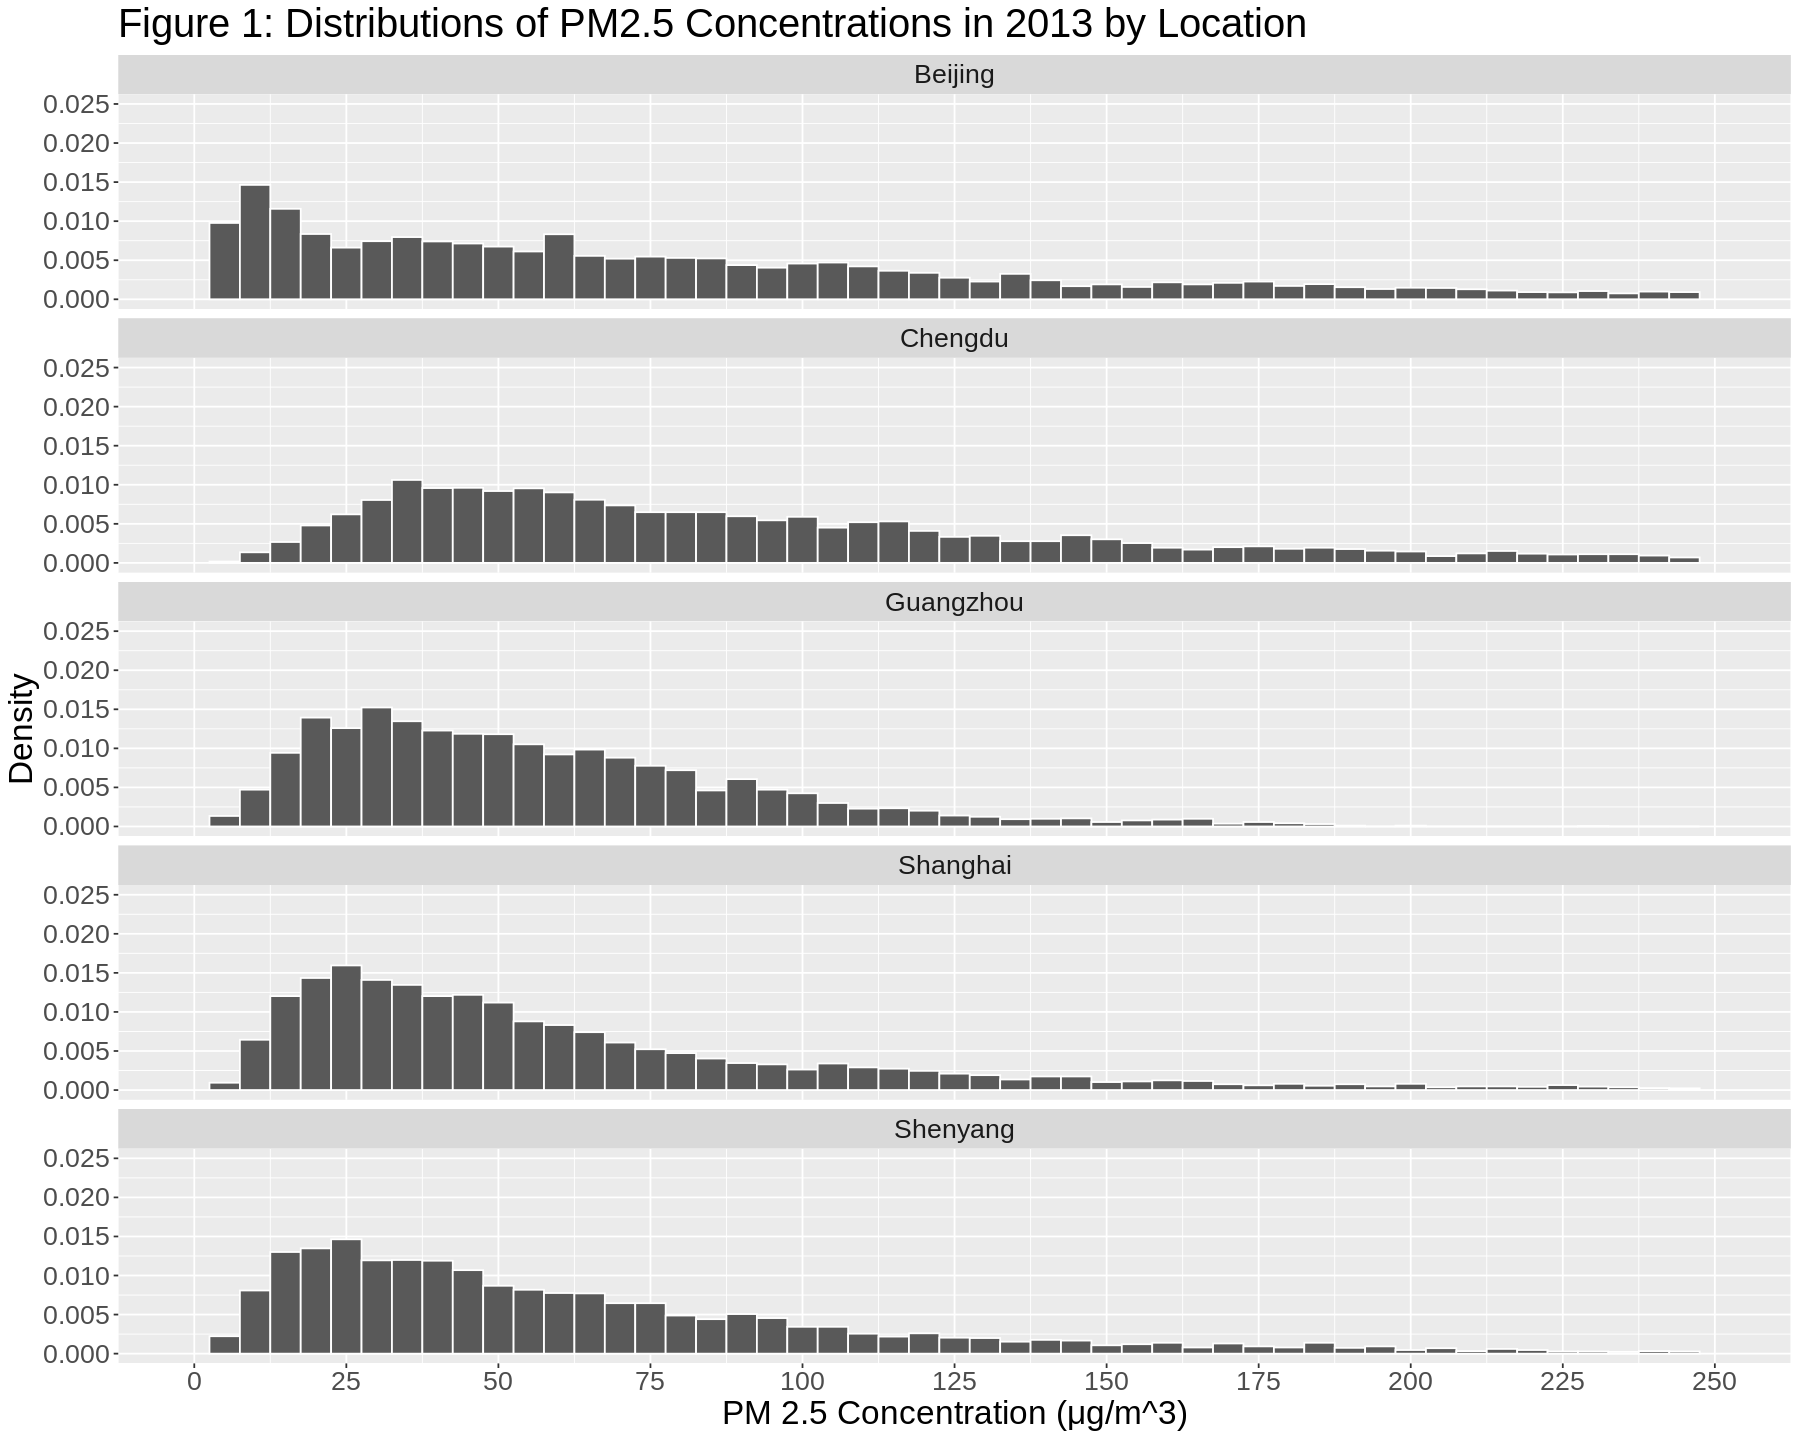

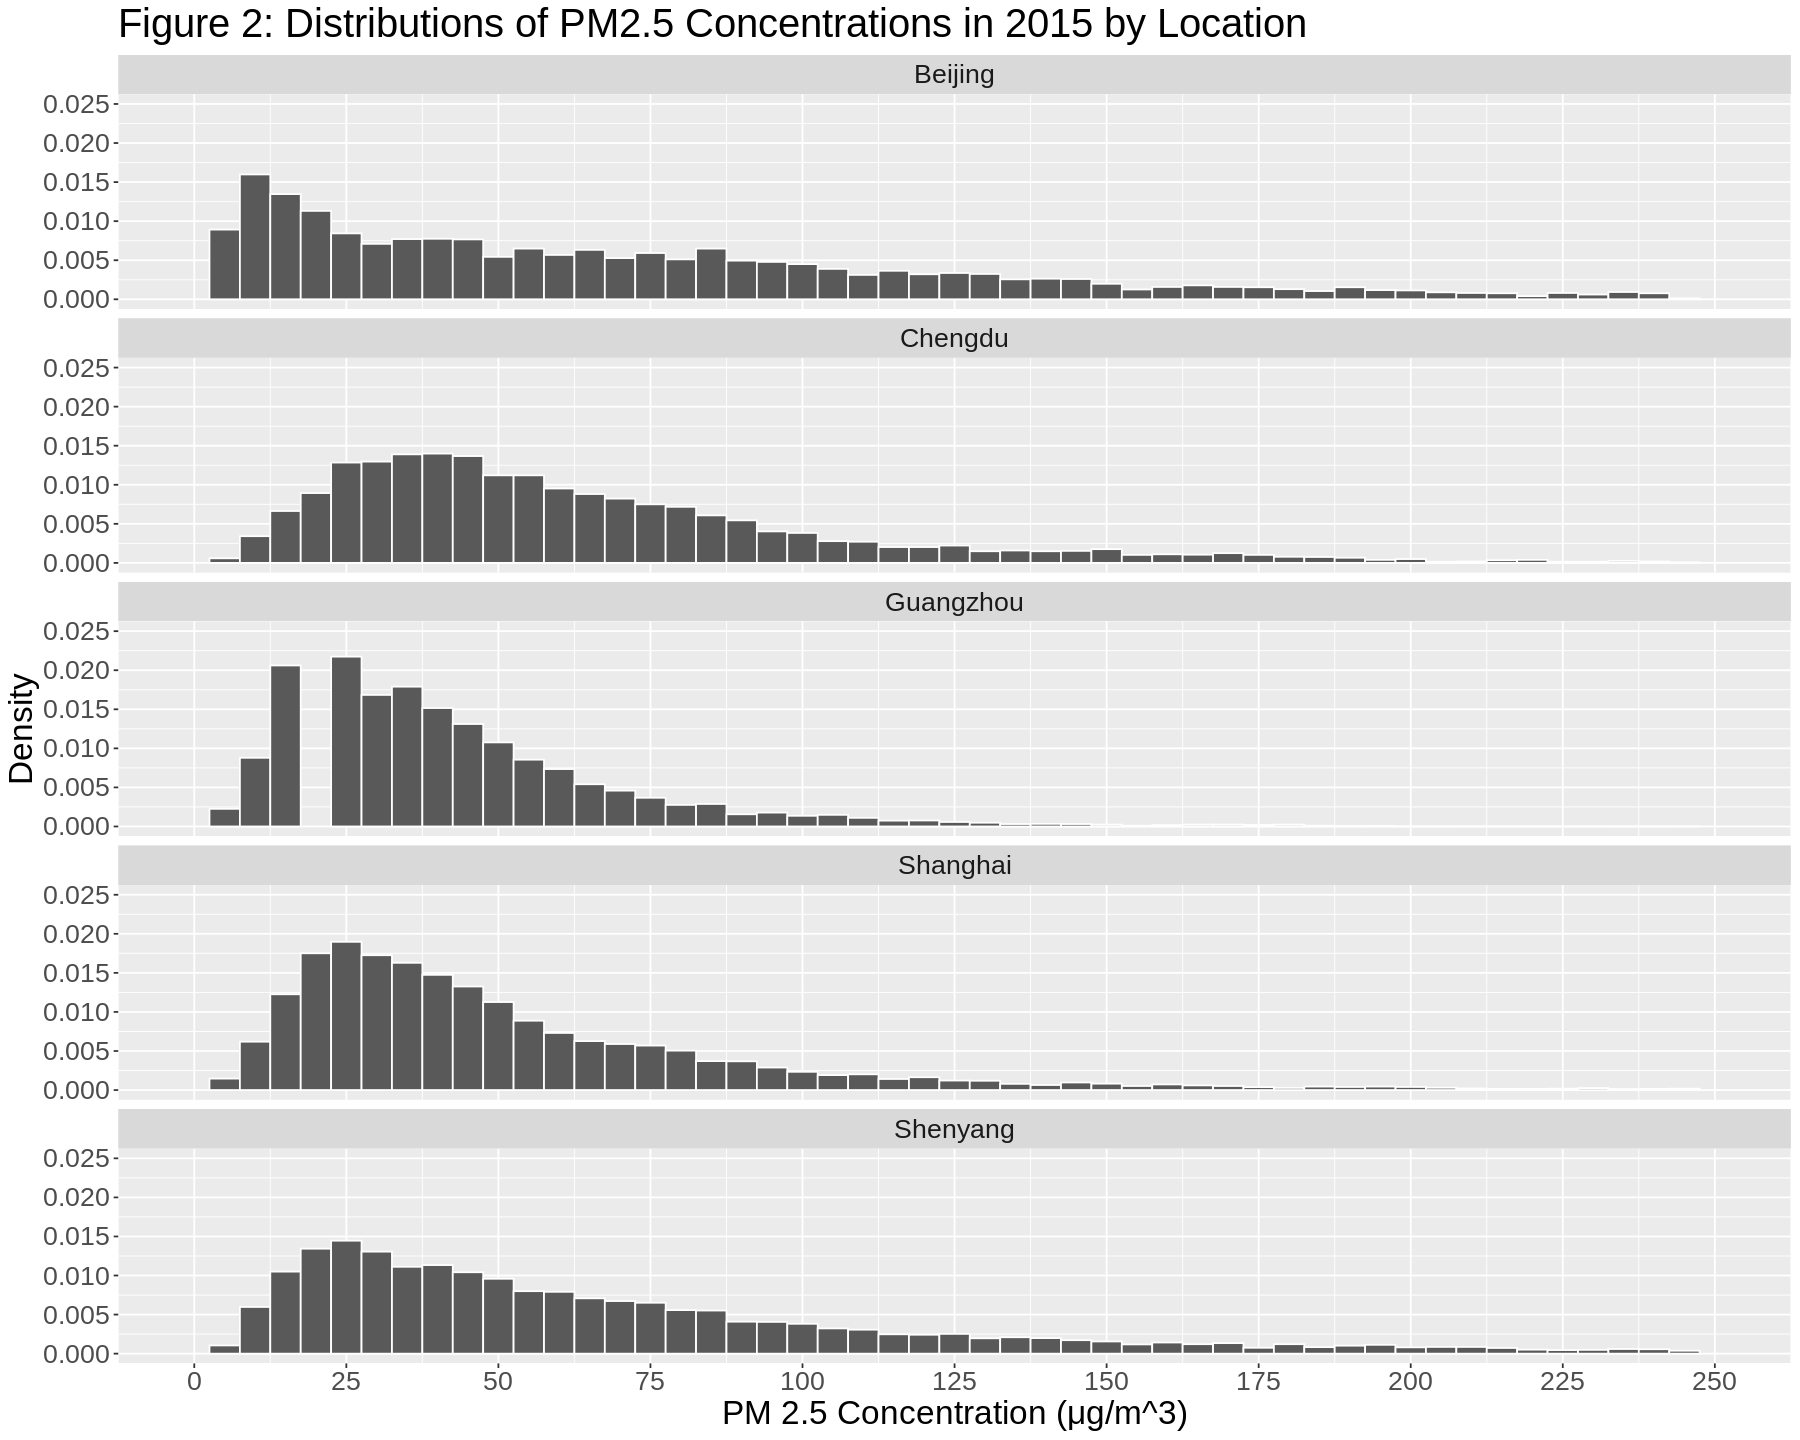

In [3]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Distribution of PM 2.5 concentrations for each location in 2013 
dist_total_2013 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2013") %>% 
    filter(year == 2013) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) +
    ggtitle("Figure 1: Distributions of PM2.5 Concentrations in 2013 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2013

# Distribution of PM 2.5 concentrations for each location in 2015 
dist_total_2015 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2015") %>% 
    filter(year == 2015) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales = "fixed", nrow = 5) + 
    ggtitle("Figure 2: Distributions of PM2.5 Concentrations in 2015 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2015

#### 2.3.2. Boxplots of PM2.5 concentrations
<!-- - The boxplots below display the general information on the overall population. -->
<!-- - The majority of values do not exceed $150 \mu g/m^3$. -->
- The first boxplot has values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. 
<!-- - There exist outlier values of up to $1150 \mu g/m^3$, with values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. -->

Warning message:
“Removed 109 rows containing non-finite values (`stat_boxplot()`).”


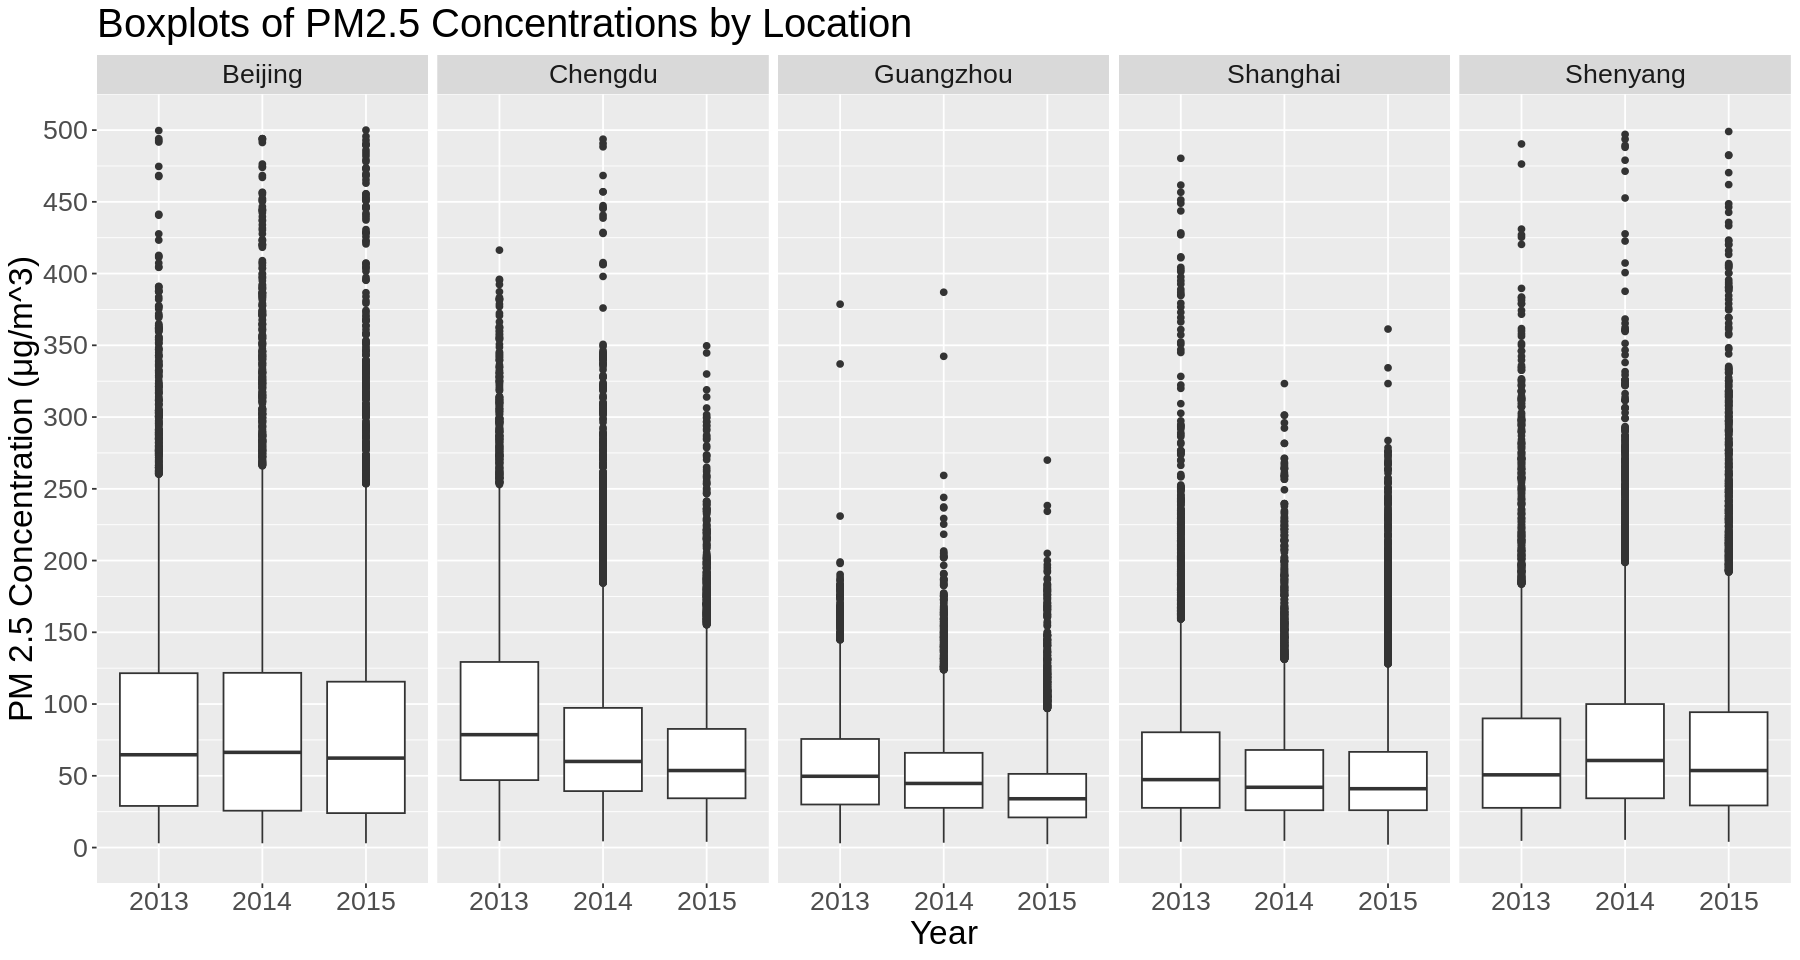

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Boxplots of PM2.5 Concentrations by Location
box_total <- total_PM2.5_AV %>% 
    mutate(year = as.character(year)) %>%
    mutate(PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "PM 2.5 Concentration (μg/m^3)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) +
    scale_y_continuous(limits = c(0, 500), breaks = seq(0, 500, by = 50))
box_total

- Due to the data containing extreme outlier values of up to $1150 \mu g/m^3$, a separate boxplot set to a logarithmic scale of base $e$ is made to display the differences between groups.

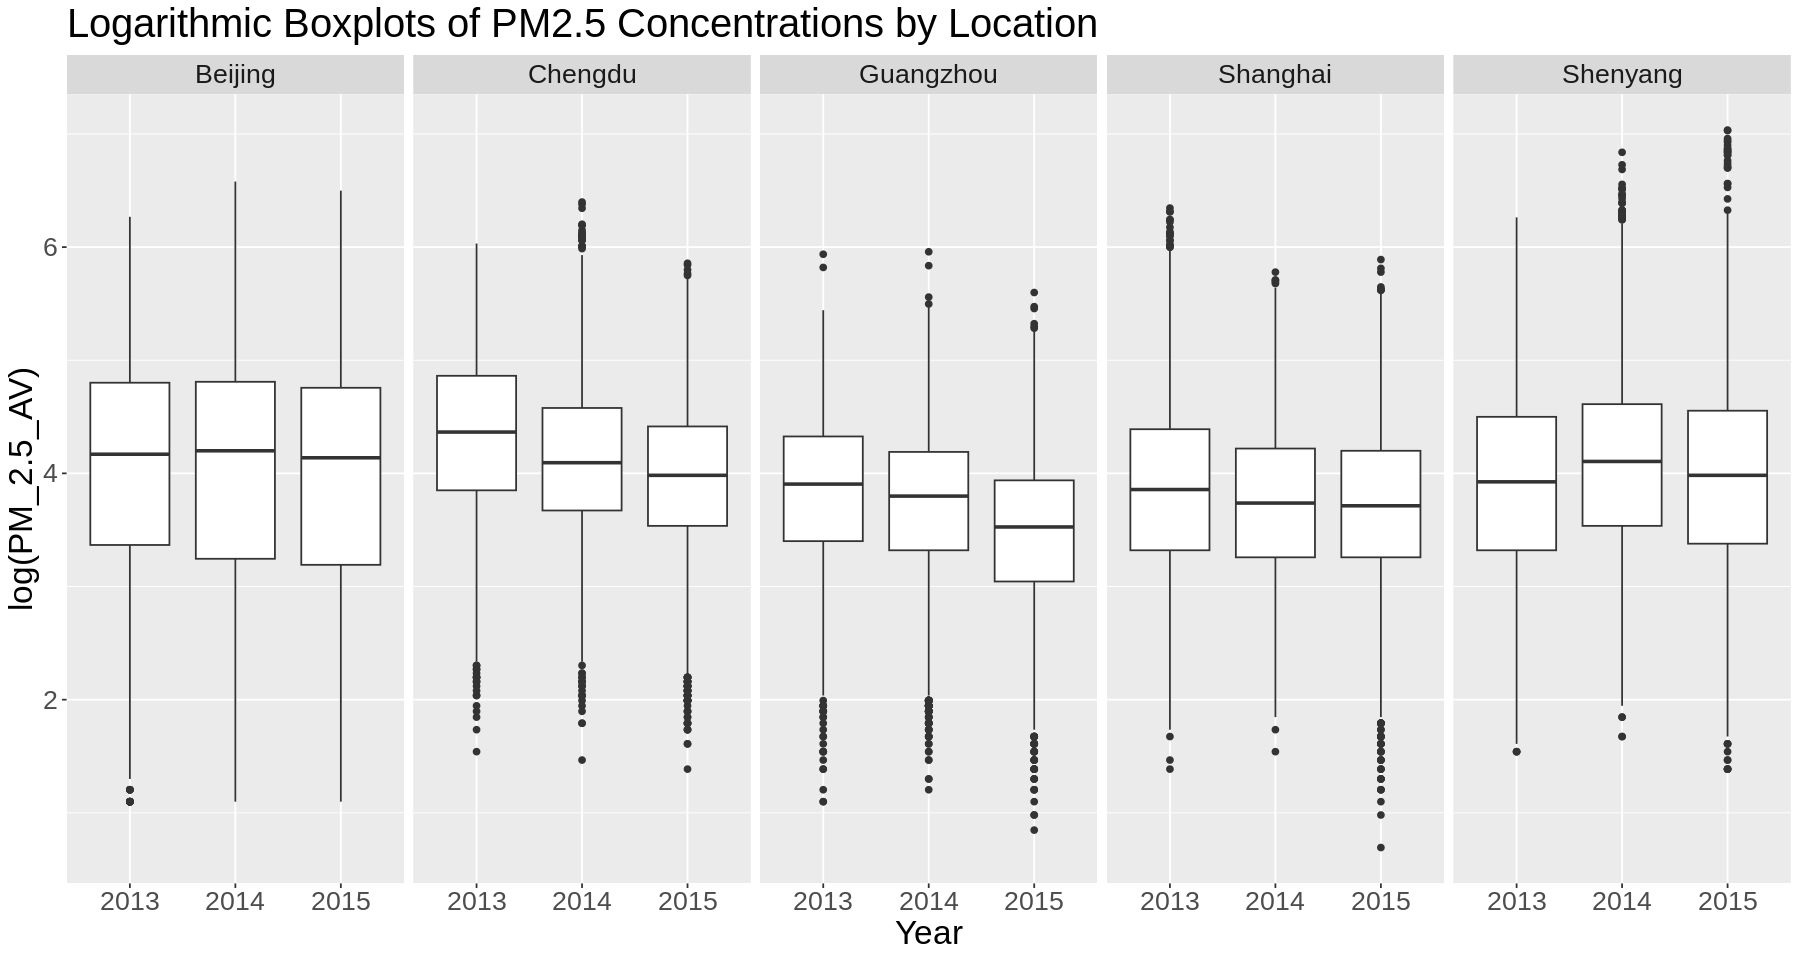

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Logarithmic Boxplots of PM2.5 Concentrations by Location
box_total_log <- total_PM2.5_AV %>% 
    mutate(year = as.character(year), PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV_log)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "log(PM_2.5_AV)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Logarithmic Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) 
box_total_log

### 2.4. Data on overall population
The data below consists of summary data for the overall population: 
<!-- - `total_PM2.5_AV_pop_data`: For each location and each year between 2013 and 2015, the following data are measured: 
    - Mean of the PM2.5 concentration values (`PM2.5_mean`)
    - Standard deviation of the PM2.5 concentration values (`PM2.5_sd`)
    - Median of the PM2.5 concentration values (`PM2.5_median`)
    - Number of values (`n`) -->
- `total_PM2.5_AV_pop_data`: For each location and each year between 2013 and 2015, the mean (`PM2.5_mean`), standard deviation (`PM2.5_sd`), median (`PM2.5_median`) and quantity (`n`) of PM2.5 concentration values are measured.
- `total_PM2.5_AV_diff_obs`: Contains test statistics for each hypothesis test.
    - `PM2.5_mean_diff_pt_est`: Differences in mean PM2.5 concentration between 2013 and 2015 as test statistics for hypothesis test 1 for each location.
    - `PM2.5_sd_diff_pt_est`: Differences in PM2.5 concentration standard deviation between 2013 and 2015 as test statistics for hypothesis test 2 for each location.
    - `PM2.5_mean_diff_se`: Standard error for sampling distribution of differences in mean PM2.5 concentration between 2013 and 2015.

In [6]:
# Count number of each combination of year and location
countChinaDates <- total_PM2.5_AV %>% 
    group_by(location, year) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
    filter(year != 2014) %>% 
    group_by(location, year) %>% 
    summarize(
        PM2.5_mean = mean(PM_2.5_AV), 
        PM2.5_sd = sd(PM_2.5_AV), 
        PM2.5_median = median(PM_2.5_AV)
    ) %>% 
    inner_join(countChinaDates) 
# %>% 
#     pivot_wider(names_from = c(location, year), values_from = c(PM2.5_mean, PM2.5_sd, n))

# total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
#     group_by(location, year) %>% 
#     summarize(PM2.5_mean = mean(PM_2.5_AV)) %>% 
#     inner_join(countChinaDates)
total_PM2.5_AV_pop_data

# Point estimates of differences in mean PM2.5 concentrations for each combination of location and year
total_PM2.5_AV_mean_diff_obs <- tibble(
    Beijing = total_PM2.5_AV_pop_data$PM2.5_mean[1] - total_PM2.5_AV_pop_data$PM2.5_mean[2], 
    Chengdu = total_PM2.5_AV_pop_data$PM2.5_mean[3] - total_PM2.5_AV_pop_data$PM2.5_mean[4],
    Guangzhou = total_PM2.5_AV_pop_data$PM2.5_mean[5] - total_PM2.5_AV_pop_data$PM2.5_mean[6],
    Shanghai = total_PM2.5_AV_pop_data$PM2.5_mean[7] - total_PM2.5_AV_pop_data$PM2.5_mean[8],
    Shenyang = total_PM2.5_AV_pop_data$PM2.5_mean[9] - total_PM2.5_AV_pop_data$PM2.5_mean[10],
) %>% 
    as.data.frame() %>% 
    pivot_longer(cols = c("Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang"), names_to = "location", values_to = "PM2.5_mean_diff_pt_est")

# Point estimates of differences in PM2.5 concentration standard deviations for each combination of location and year 
total_PM2.5_AV_sd_diff_obs <- tibble(
    Beijing = total_PM2.5_AV_pop_data$PM2.5_sd[1] - total_PM2.5_AV_pop_data$PM2.5_sd[2], 
    Chengdu = total_PM2.5_AV_pop_data$PM2.5_sd[3] - total_PM2.5_AV_pop_data$PM2.5_sd[4],
    Guangzhou = total_PM2.5_AV_pop_data$PM2.5_sd[5] - total_PM2.5_AV_pop_data$PM2.5_sd[6],
    Shanghai = total_PM2.5_AV_pop_data$PM2.5_sd[7] - total_PM2.5_AV_pop_data$PM2.5_sd[8],
    Shenyang = total_PM2.5_AV_pop_data$PM2.5_sd[9] - total_PM2.5_AV_pop_data$PM2.5_sd[10],
) %>% 
    as.data.frame() %>% 
    pivot_longer(cols = c("Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang"), names_to = "location", values_to = "PM2.5_sd_diff_pt_est")
# total_PM2.5_AV_sd_diff_obs

total_PM2.5_AV_mean_diff_se <- tibble(
    Beijing = sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[1])^2/(total_PM2.5_AV_pop_data$n[1]) + (total_PM2.5_AV_pop_data$PM2.5_sd[2])^2/(total_PM2.5_AV_pop_data$n[2])), 
    Chengdu = sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[3])^2/(total_PM2.5_AV_pop_data$n[3]) + (total_PM2.5_AV_pop_data$PM2.5_sd[4])^2/(total_PM2.5_AV_pop_data$n[4])),
    Guangzhou = sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[5])^2/(total_PM2.5_AV_pop_data$n[5]) + (total_PM2.5_AV_pop_data$PM2.5_sd[6])^2/(total_PM2.5_AV_pop_data$n[6])),
    Shanghai = sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[7])^2/(total_PM2.5_AV_pop_data$n[7]) + (total_PM2.5_AV_pop_data$PM2.5_sd[8])^2/(total_PM2.5_AV_pop_data$n[8])),
    Shenyang = sqrt((total_PM2.5_AV_pop_data$PM2.5_sd[9])^2/(total_PM2.5_AV_pop_data$n[9]) + (total_PM2.5_AV_pop_data$PM2.5_sd[10])^2/(total_PM2.5_AV_pop_data$n[10]))
) %>% 
    as.data.frame() %>% 
    pivot_longer(cols = c("Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang"), names_to = "location", values_to = "PM2.5_mean_diff_se")
# total_PM2.5_AV_mean_diff_se

total_PM2.5_AV_diff_obs <- merge(total_PM2.5_AV_mean_diff_obs, total_PM2.5_AV_sd_diff_obs, by = "location") %>% 
    merge(total_PM2.5_AV_mean_diff_se, by = "location")
# list(total_PM2.5_AV_mean_diff_obs, total_PM2.5_AV_sd_diff_obs, total_PM2.5_AV_mean_diff_se) %>% 
#     reduce(full_join, by = "location") %>% 
#     as.data.frame()
total_PM2.5_AV_diff_obs

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.
Joining with `by = join_by(location, year)`


location,year,PM2.5_mean,PM2.5_sd,PM2.5_median,n
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
Beijing,2013,87.36825,77.58735,64.66667,6367
Beijing,2015,86.92798,87.29696,62.66667,5235
Chengdu,2013,98.31510,69.02849,78.66667,6032
Chengdu,2015,65.18370,44.51713,53.66667,8229
Guangzhou,2013,56.99301,35.61265,49.66667,3863
Guangzhou,2015,40.59729,27.67423,34.00000,8327
Shanghai,2013,63.99229,55.21316,47.33333,7309
Shanghai,2015,52.87839,40.83099,41.00000,8072
Shenyang,2013,70.33401,63.88846,50.66667,4439


location,PM2.5_mean_diff_pt_est,PM2.5_sd_diff_pt_est,PM2.5_mean_diff_se
<chr>,<dbl>,<dbl>,<dbl>
Beijing,0.4402683,-9.709605,1.5495809
Chengdu,33.1313973,24.511357,1.0152687
Guangzhou,16.3957167,7.938422,0.6482926
Shanghai,11.1139064,14.382170,0.7896993
Shenyang,-6.3499447,-15.882940,1.3231783


## 3. Methods and Results

The dataset used in this report contains measurements for PM2.5 concentrations in specific places within each city and for each hour. This allows for potential variations in PM2.5 concentrations depending on location and time to be accounted for. This report provides information about the distribution of PM2.5 concentrations through histograms and boxplots, as well as test statistics for the differences in mean PM2.5 concentrations between 2013 and 2015 for each location, providing an idea of what difference measurements are to be expected. 

So far, we have examined the difference in air quality between 2013 and 2015 for 5 cities in China. However, we cannot know with our preliminary results if the calculated differences are statistically significant. For our results to be more trustworthy, the following have been implemented:
- Bootstrap sampling distributions of mean differences with central limit theorem
- 95% confidence intervals by both bootstrapping and by central limit theorem for mean differences
- Hypothesis tests with 0.05 significance level 
    - z-test and t-test for mean differences 
    - F-test for differences in standard deviation
- Null model formed using test statistics

As a result of the policy intervention, we anticipate a substantial improvement in the air quality of at least three out of the five cities in our study (i.e., a majority of the cities). This improvement would be reflected in a significant reduction in PM2.5 levels, indicating that the policy has effectively addressed the air quality issues in these cities.

Our study aims to provide an understanding of the real-life impacts of air quality policies. By highlighting the severe health and environmental consequences of poor air quality, our study can drive the development of more targeted and effective policies to improve air quality.

### 3.1. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for Mean differences
- Bootstrap sampling distribution of mean differences is obtained using the `infer` package.
    - The original sample is used as an estimate of the overall population. 
    - Bootstrap samples are created by sampling from the original sample with replacement.
        - Each bootstrap sample is equal to the original sample size.
    - Bootstrapping is repeated 1000 times to obtain 1000 separate bootstrap samples. 
    - The point estimate (Sample mean) is calculated for each replicated bootstrap sample to obtain a bootstrap sampling distribution of the estimate.
- 95% confidence interval of differences in means by bootstrapping is obtained using `get_confidence_interval()`.
- `shade_confidence_interval()` is used on the plot to visualise the 95% confidence interval of differences in means.
- `ggplot` is used to visualise `BJ_boot_diff_in_means`, along with `BJ_clt_samp_dist` and `BJ_boot_diff_in_means_ci`.
- Each bootstrapping of mean differences, along with obtaining their corresponding confidence intervals and plots, is applied separately for each location.

In [7]:
options(repr.plot.width = 10, repr.plot.height = 4)
# Set seed for consistent results
set.seed(46201)

# _________________________________________________
## BEIJING 
# Bootstrap samples for mean differences 
BJ_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# Normal distribution
BJ_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[1] - 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[1], 
                total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[1] + 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[1], 0.0001),
        density = dnorm(x, total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[1], total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[1])
    )

# 95% confidence interval obtained from bootstrap samples 
BJ_boot_diff_in_means_ci <- BJ_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
BJ_boot_diff_in_means_plot <- BJ_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 20, color = 'white') + 
    # shade_p_value(obs_stat = BJ_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis Test for Difference in Means (Beijing)") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = BJ_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = BJ_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15))
# BJ_boot_diff_in_means_plot

# _________________________________________________
## CHENGDU 
# Bootstrap samples for mean differences 
CD_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# Normal distribution
CD_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[2] - 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[2], 
                total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[2] + 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[2], 0.0001),
        density = dnorm(x, total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[2], total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[2])
    )

# 95% confidence interval obtained from bootstrap samples 
CD_boot_diff_in_means_ci <- CD_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
CD_boot_diff_in_means_plot <- CD_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 20, color = 'white') + 
    # shade_p_value(obs_stat = CD_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis Test for Difference in Means (Chengdu)") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = CD_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = CD_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15))
# CD_boot_diff_in_means_plot

# _________________________________________________
## GUANGZHOU 
# Bootstrap samples for mean differences 
GZ_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Guangzhou", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# Normal distribution
GZ_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[3] - 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[3], 
                total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[3] + 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[3], 0.0001),
        density = dnorm(x, total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[3], total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[3])
    )

# 95% confidence interval obtained from bootstrap samples 
GZ_boot_diff_in_means_ci <- GZ_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
GZ_boot_diff_in_means_plot <- GZ_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 20, color = 'white') + 
    # shade_p_value(obs_stat = GZ_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis Test for Difference in Means (Guangzhou)") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = GZ_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = GZ_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15))
# GZ_boot_diff_in_means_plot

# _________________________________________________
## SHANGHAI 
# Bootstrap samples for mean differences 
SH_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Shanghai", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# Normal distribution
SH_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[4] - 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[4], 
                total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[4] + 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[4], 0.0001),
        density = dnorm(x, total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[4], total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[4])
    )

# 95% confidence interval obtained from bootstrap samples 
SH_boot_diff_in_means_ci <- SH_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
SH_boot_diff_in_means_plot <- SH_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 20, color = 'white') + 
    # shade_p_value(obs_stat = SH_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis Test for Difference in Means (Shanghai)") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = SH_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = SH_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15))
# SH_boot_diff_in_means_plot

# _________________________________________________
## SHENYANG 

# Bootstrap samples for mean differences 
SY_boot_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Shenyang", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# Normal distribution
SY_clt_samp_dist <- 
    tibble(
        x = seq(total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[5] - 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[5], 
                total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[5] + 4 * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[5], 0.0001),
        density = dnorm(x, total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[5], total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[5])
    )

# 95% confidence interval obtained from bootstrap samples 
SY_boot_diff_in_means_ci <- SY_boot_diff_in_means %>%
    get_confidence_interval(level = 0.95, type = "percentile") 

# Plot of bootstrap hypothesis test with 95% confidence interval
SY_boot_diff_in_means_plot <- SY_boot_diff_in_means %>%
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 20, color = 'white') + 
    # shade_p_value(obs_stat = SY_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis Test for Difference in Means (Shanghai)") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    geom_line(data = SY_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = SY_boot_diff_in_means_ci) + 
    theme(text = element_text(size = 15))
# SY_boot_diff_in_means_plot

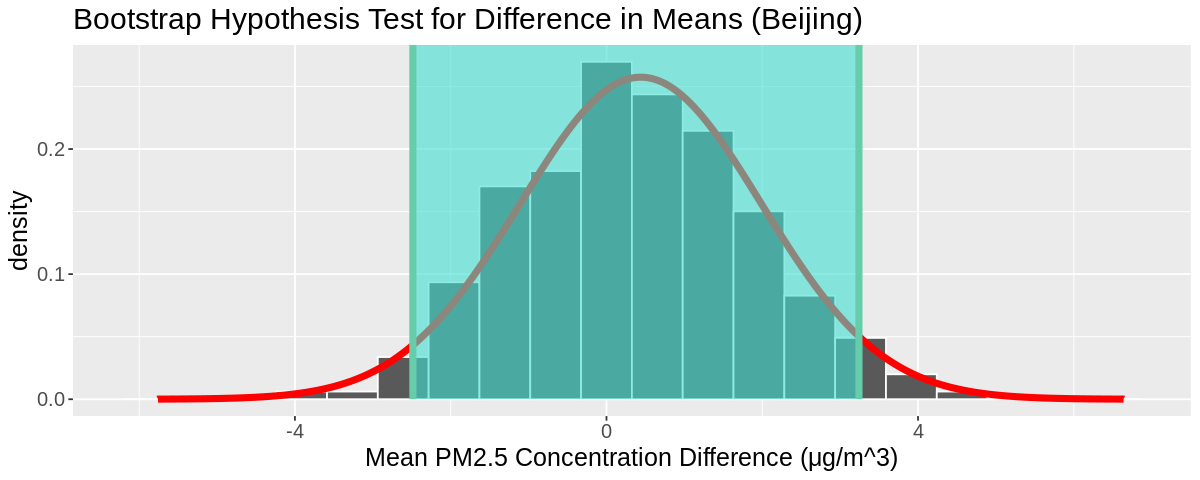

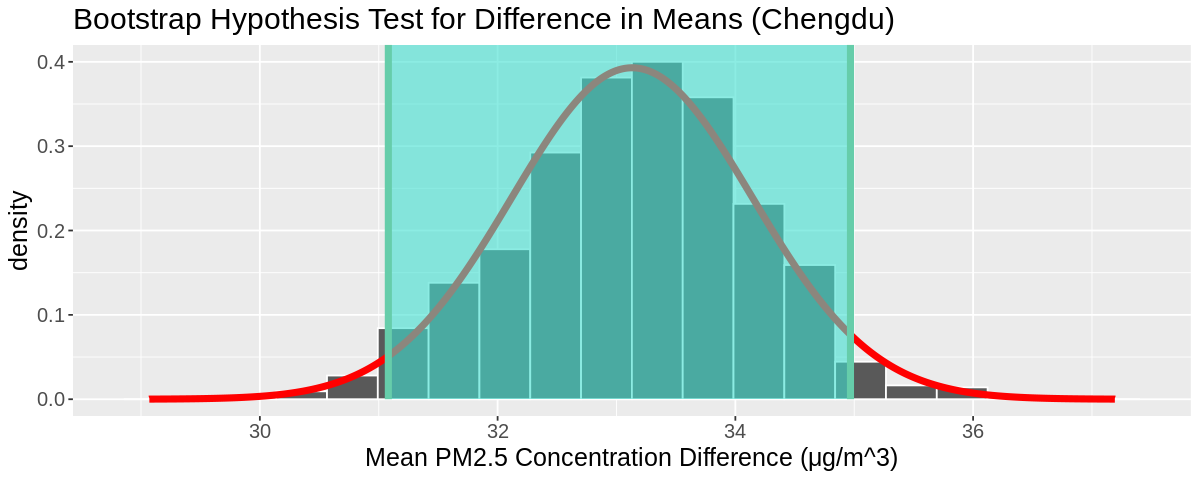

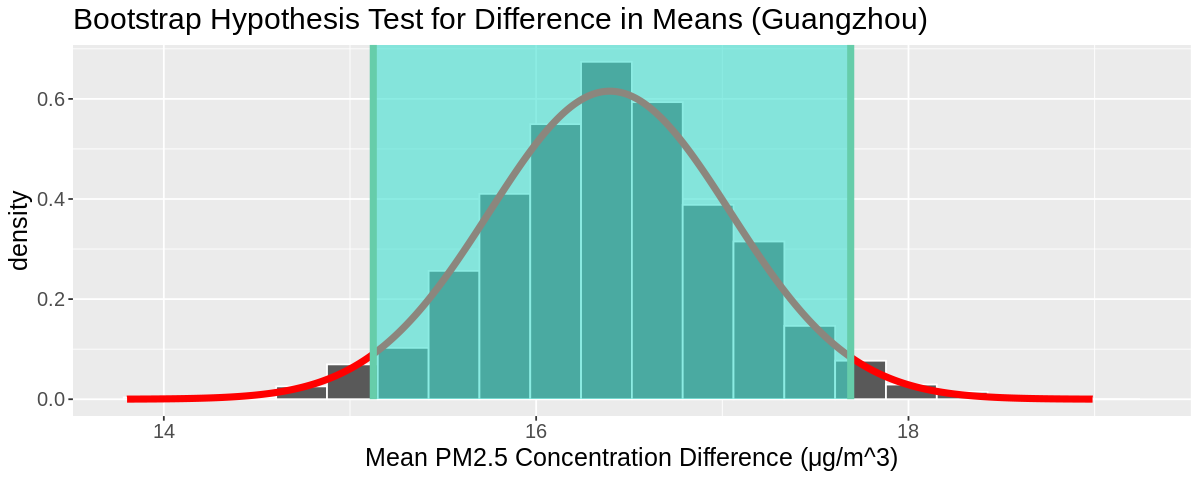

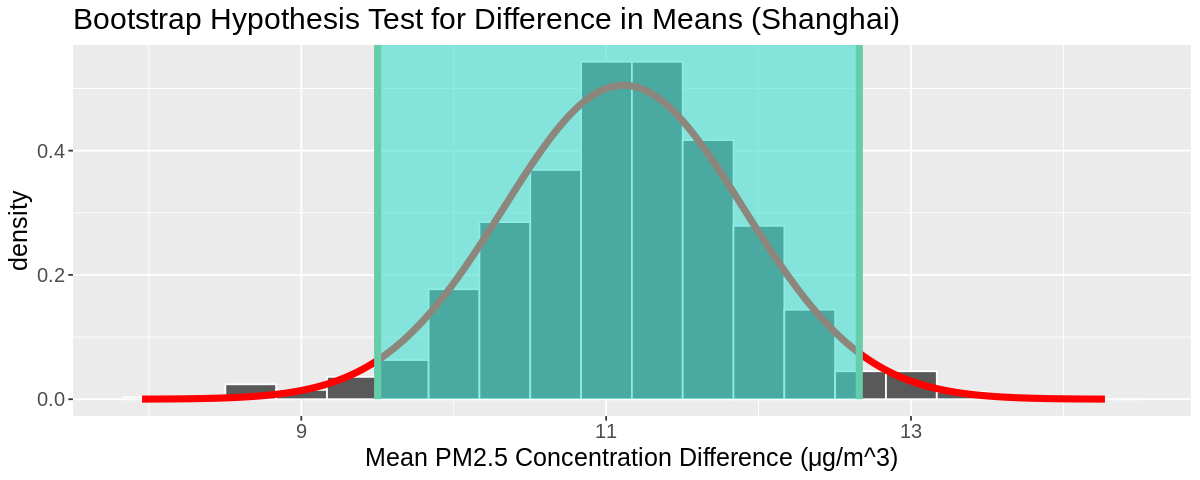

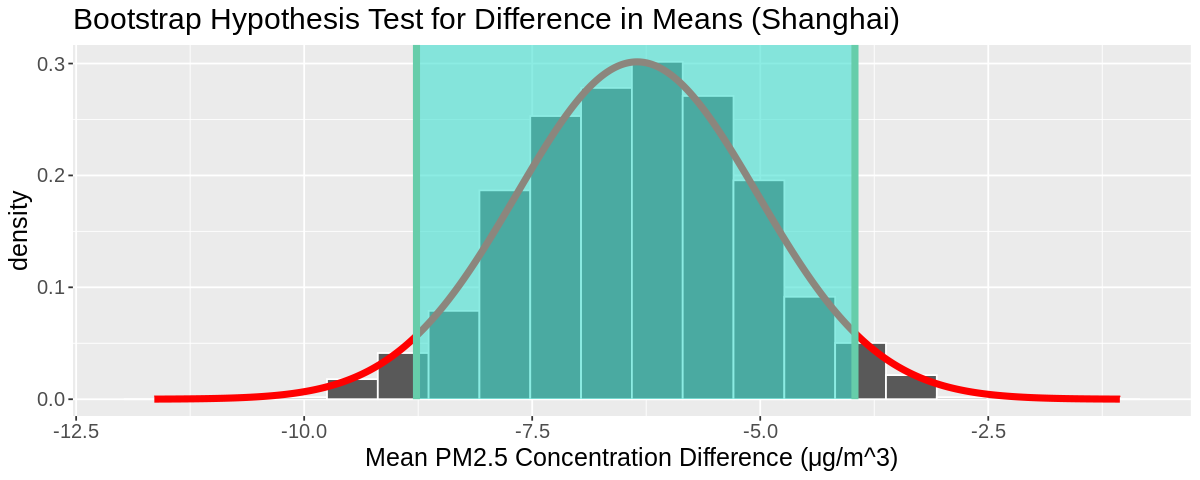

In [8]:
BJ_boot_diff_in_means_plot
CD_boot_diff_in_means_plot
GZ_boot_diff_in_means_plot
SH_boot_diff_in_means_plot
SY_boot_diff_in_means_plot

### 3.2. Confidence intervals based on bootstrapping and CLT
- The CLT states that if the sample size $n$ is sufficiently large, the sampling distribution will be approximately normally distributed, even if the underlying distribution of individual observations in the population is not normally distributed. 
- The 95% CLT confidence interval is chosen over bootstrapping, as the parameter we are investigating is the mean differences in PM2.5 concentrations, and each individual sample size is greater than 3000.
- Since the variance of the normal distribution is unknown, we will need to estimate it. This will be accounted for by having the sampling distribution of mean differences follow a t-distribution with $n - 1$ degrees of freedom.

In [9]:
total_boot_diff_in_means_ci <- dplyr::bind_rows(
    BJ_boot_diff_in_means_ci, 
    CD_boot_diff_in_means_ci, 
    GZ_boot_diff_in_means_ci, 
    SH_boot_diff_in_means_ci, 
    SY_boot_diff_in_means_ci
) %>% 
    mutate(location = c("Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang")) %>% 
    rename(
        lower_ci_boot = lower_ci, 
        upper_ci_boot = upper_ci
    ) %>% 
    select(location, lower_ci_boot, upper_ci_boot)
# total_boot_diff_in_means_ci

total_clt_diff_in_means_ci <- tibble(
    location = c("Beijing", "Chengdu", "Guangzhou", "Shanghai", "Shenyang"), 
    lower_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] - qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)],
    upper_ci_clt = total_PM2.5_AV_diff_obs$PM2.5_mean_diff_pt_est[c(1, 2, 3, 4, 5)] + qnorm(0.975) * total_PM2.5_AV_diff_obs$PM2.5_mean_diff_se[c(1, 2, 3, 4, 5)]
)
# total_clt_diff_in_means_ci

total_diff_in_means_ci <- list(
    total_boot_diff_in_means_ci, 
    total_clt_diff_in_means_ci
) %>% 
    reduce(full_join, by = "location") 
total_diff_in_means_ci

location,lower_ci_boot,upper_ci_boot,lower_ci_clt,upper_ci_clt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Beijing,-2.485741,3.241634,-2.596854,3.477391
Chengdu,31.080756,34.968413,31.141507,35.121287
Guangzhou,15.125127,17.689628,15.125087,17.666347
Shanghai,9.500770,12.660974,9.566124,12.661689
Shenyang,-8.768600,-3.961371,-8.943326,-3.756563


### 3.3. Two-sample t-test for Mean Differences
- Data frames for each combination of location and year are created (`BJ_2013`, `BJ_2015`, `CD_2013`, `CD_2015`, `GZ_2013`, `GZ_2015`, `SH_2013`, `SH_2015`, `SY_2013`, `SY_2015`)
- `tidy()` is used to obtain the results of `t.test()` in a more orderly manner. 
    - Since the hypothesis test is one sided, `alternative = "greater"` is used.
    - The `reject_h0` column is created to explicitly show the result of the hypothesis test.
- P-values: 
    - `p.value` $< 0.05$: Result is statistically significant; there is sufficient evidence to reject $H_0$ at the 5% significance level.
    - `p.value`$\geq 0.05$: Result is not statistically significant; there is insufficient evidence to reject $H_0$ at the 5% significance level.
    - `p.value` $< 0.001$: Result is highly statistically significant; there is sufficient evidence to reject $H_0$ at the 5% significance level (Used to minimise Type I error)
<!-- - `statistic`: t-statistic from test -->
- `dplyr::bind_rows()` is used to join the tables together.

In [17]:
# _________________________________________________
## BEIJING 
# Data for Beijing in 2013
BJ_2013 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Beijing in 2015
BJ_2015 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# t-test for mean differences in Beijing
BJ_ttest_diff_in_means <- 
    tidy(
        t.test(x = BJ_2013,
               y = BJ_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )  %>% 
    as.data.frame() %>% 
    mutate(location = "Beijing", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, parameter, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# BJ_ttest_diff_in_means 
    
# _________________________________________________
## CHENGDU 
# Data for Chengdu in 2013
CD_2013 <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Chengdu in 2015
CD_2015 <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# t-test for mean differences in Chengdu
CD_ttest_diff_in_means <- 
    tidy(
        t.test(x = CD_2013,
               y = CD_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )  %>% 
    as.data.frame() %>% 
    mutate(location = "Chengdu", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, parameter, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# CD_ttest_diff_in_means 

# _________________________________________________
## GUANGZHOU 
# Data for Guangzhou in 2013
GZ_2013 <- total_PM2.5_AV %>% 
    filter(location == "Guangzhou", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Guangzhou in 2015
GZ_2015 <- total_PM2.5_AV %>% 
    filter(location == "Guangzhou", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# t-test for mean differences in Guangzhou
GZ_ttest_diff_in_means <- 
    tidy(
        t.test(x = GZ_2013,
               y = GZ_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )  %>% 
    as.data.frame() %>% 
    mutate(location = "Guangzhou", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, parameter, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# GZ_ttest_diff_in_means 

# _________________________________________________
## SHANGHAI 
# Data for Shanghai in 2013
SH_2013 <- total_PM2.5_AV %>% 
    filter(location == "Shanghai", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Shanghai in 2015
SH_2015 <- total_PM2.5_AV %>% 
    filter(location == "Shanghai", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# t-test for mean differences in Shanghai
SH_ttest_diff_in_means <- 
    tidy(
        t.test(x = SH_2013,
               y = SH_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )  %>% 
    as.data.frame() %>% 
    mutate(location = "Shanghai", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, parameter, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# SH_ttest_diff_in_means 

# _________________________________________________
## SHENYANG 
# Data for Shenyang in 2013
SY_2013 <- total_PM2.5_AV %>% 
    filter(location == "Shenyang", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Shenyang in 2015
SY_2015 <- total_PM2.5_AV %>% 
    filter(location == "Shenyang", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# t-test for mean differences in Shenyang
SY_ttest_diff_in_means <- 
    tidy(
        t.test(x = SY_2013,
               y = SY_2015,
               alternative = "greater", 
               conf.level = 0.95)
    )  %>% 
    as.data.frame() %>% 
    mutate(location = "Shenyang", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, parameter, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# SY_ttest_diff_in_means 

total_ttest_diff_in_means <- dplyr::bind_rows(
    BJ_ttest_diff_in_means, 
    CD_ttest_diff_in_means, 
    GZ_ttest_diff_in_means, 
    SH_ttest_diff_in_means, 
    SY_ttest_diff_in_means
)
total_ttest_diff_in_means

location,estimate,p.value,conf.interval,reject_h0,reject_h0_high
<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
Beijing,0.4402683,3.881617e-01,"[-2.10878877184952, Inf]",FALSE,FALSE
Chengdu,33.1313973,6.290831e-222,"[31.4612680127383, Inf]",TRUE,TRUE
Guangzhou,16.3957167,1.351902e-134,"[15.3292084866111, Inf]",TRUE,TRUE
Shanghai,11.1139064,5.747942e-45,"[9.81487671216298, Inf]",TRUE,TRUE
Shenyang,-6.3499447,9.999992e-01,"[-8.52656394371631, Inf]",FALSE,FALSE


### 3.4. Two-sample F-test for Differences in Standard Deviation
- F-test is conducted to compare the variances between years for each location.
- F-test normally assumes normality in data, but may still work if the sample size is sufficiently large. 
- Data frames for each combination of location and year are created, similar to the above t-test.
- `tidy()` is used to obtain the results of `var.test()` in a more orderly manner. 
    - Since the hypothesis test is two sided, `alternative = "two.sided"` is used.
    - The `reject_h0` column is created to explicitly show the result of the hypothesis test.
- P-values: 
    - `p.value` $< 0.05$: Result is statistically significant; there is sufficient evidence to reject $H_0$ at the 5% significance level.
    - `p.value`$\geq 0.05$: Result is not statistically significant; there is insufficient evidence to reject $H_0$ at the 5% significance level.
    - `p.value` $< 0.001$: Result is highly statistically significant; there is sufficient evidence to reject $H_0$ at the 5% significance level (Used to minimise Type I error)

In [18]:
# _________________________________________________
## BEIJING 
# Data for Beijing in 2013
BJ_2013 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Beijing in 2015
BJ_2015 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# F-test for mean differences in Beijing
BJ_ftest_diff_in_sd <- 
    tidy(
        var.test(x = BJ_2013,
               y = BJ_2015,
               alternative = "two.sided", 
               conf.level = 0.95)
    ) %>% 
    as.data.frame() %>% 
    mutate(location = "Beijing", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# BJ_ftest_diff_in_sd 

# _________________________________________________
## CHENGDU 
# Data for Chengdu in 2013
CD_2013 <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Chengdu in 2015
CD_2015 <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# F-test for mean differences in Beijing
CD_ftest_diff_in_sd <- 
    tidy(
        var.test(x = CD_2013,
               y = CD_2015,
               alternative = "two.sided", 
               conf.level = 0.95)
    ) %>% 
    as.data.frame() %>% 
    mutate(location = "Chengdu", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# CD_ftest_diff_in_sd 

# _________________________________________________
## GUANGZHOU 
# Data for Guangzhou in 2013
GZ_2013 <- total_PM2.5_AV %>% 
    filter(location == "Guangzhou", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Beijing in 2015
GZ_2015 <- total_PM2.5_AV %>% 
    filter(location == "Guangzhou", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# F-test for mean differences in Guangzhou
GZ_ftest_diff_in_sd <- 
    tidy(
        var.test(x = GZ_2013,
               y = GZ_2015,
               alternative = "two.sided", 
               conf.level = 0.95)
    ) %>% 
    as.data.frame() %>% 
    mutate(location = "Guangzhou", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# GZ_ftest_diff_in_sd 

# _________________________________________________
## SHANGHAI 
# Data for Shanghai in 2013
SH_2013 <- total_PM2.5_AV %>% 
    filter(location == "Shanghai", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Beijing in 2015
SH_2015 <- total_PM2.5_AV %>% 
    filter(location == "Shanghai", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# F-test for mean differences in Shanghai
SH_ftest_diff_in_sd <- 
    tidy(
        var.test(x = SH_2013,
               y = SH_2015,
               alternative = "two.sided", 
               conf.level = 0.95)
    ) %>% 
    as.data.frame() %>% 
    mutate(location = "Shanghai", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# SH_ftest_diff_in_sd 

# _________________________________________________
## SHENYANG 
# Data for Shenyang in 2013
SY_2013 <- total_PM2.5_AV %>% 
    filter(location == "Shenyang", year == 2013) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# Data for Shenyang in 2015
SY_2015 <- total_PM2.5_AV %>% 
    filter(location == "Shenyang", year == 2015) %>% 
    select(PM_2.5_AV) %>% 
    pull()

# F-test for mean differences in Shenyang
SY_ftest_diff_in_sd <- 
    tidy(
        var.test(x = SY_2013,
               y = SY_2015,
               alternative = "two.sided", 
               conf.level = 0.95)
    ) %>% 
    as.data.frame() %>% 
    mutate(location = "Shenyang", conf.interval = paste0("[", conf.low, ", ", conf.high, "]"), reject_h0 = (p.value < 0.05), reject_h0_high = (p.value < 0.001)) %>% 
    # select(location, estimate, p.value, conf.interval, statistic, reject_h0)
    select(location, estimate, p.value, conf.interval, reject_h0, reject_h0_high)
# SY_ftest_diff_in_sd 

total_ftest_diff_in_sd <- dplyr::bind_rows(
    BJ_ftest_diff_in_sd, 
    CD_ftest_diff_in_sd, 
    GZ_ftest_diff_in_sd, 
    SH_ftest_diff_in_sd, 
    SY_ftest_diff_in_sd
)
total_ftest_diff_in_sd

Multiple parameters; naming those columns num.df, den.df

Multiple parameters; naming those columns num.df, den.df

Multiple parameters; naming those columns num.df, den.df

Multiple parameters; naming those columns num.df, den.df

Multiple parameters; naming those columns num.df, den.df



location,estimate,p.value,conf.interval,reject_h0,reject_h0_high
<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
Beijing,0.7899210,3.203102e-19,"[0.750052778160075, 0.831798276812661]",TRUE,TRUE
Chengdu,2.4043760,0.000000e+00,"[2.29420644565453, 2.52027056656146]",TRUE,TRUE
Guangzhou,1.6559894,0.000000e+00,"[1.56940803484092, 1.74829233513545]",TRUE,TRUE
Shanghai,1.8285439,0.000000e+00,"[1.74854588482197, 1.91229836262798]",TRUE,TRUE
Shenyang,0.6414317,1.915490e-59,"[0.608857852006057, 0.675997504534333]",TRUE,TRUE


### 3.5. Visualizing Hypothesis Test for Mean Differences
- Generate null distribution for difference in means of PM2.5 cocentrations using `specify()` + `hypothesise()` + `generate()` + `calculate()`.
- Obtain the p-value from the null distribution.
- `visualise()` to display the null distribution of the mean differences in PM2.5 concentrations for each location.
    - The p-value is represented with a vertical red line, with the area to the right being shaded.
- Repeat the steps above for each separate location.

In [12]:
# Set seed for consistent results
set.seed(46201)

# _________________________________________________
## BEIJING
# Null distribution for mean differences in Beijing
BJ_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# p-value for hypothesis test
BJ_null_diff_in_means_p <- BJ_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[1], direction = "right")

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic 
BJ_null_diff_in_means_plot <- BJ_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[1], direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Beijing") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size = 15))
# BJ_null_diff_in_means_plot

# _________________________________________________
## CHENGDU
# Null distribution for mean differences in Chengdu
CD_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Chengdu", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# p-value for hypothesis test
CD_null_diff_in_means_p <- CD_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[2], direction = "right")

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic 
CD_null_diff_in_means_plot <- CD_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[2], direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Chengdu") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size = 15))
# CD_null_diff_in_means_plot

# _________________________________________________
## GUANGZHOU
# Null distribution for mean differences in Guangzhou
GZ_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# p-value for hypothesis test
GZ_null_diff_in_means_p <- GZ_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[3], direction = "right")

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic 
GZ_null_diff_in_means_plot <- GZ_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[3], direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Guangzhou") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size = 15))
# GZ_null_diff_in_means_plot

# _________________________________________________
## SHANGHAI
# Null distribution for mean differences in Shanghai
SH_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# p-value for hypothesis test
SH_null_diff_in_means_p <- SH_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[4], direction = "right")

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic 
SH_null_diff_in_means_plot <- SH_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[4], direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Shanghai") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size = 15))
# SH_null_diff_in_means_plot

# _________________________________________________
## SHENYANG
# Null distribution for mean differences in Shenyang
SY_null_diff_in_means <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year != 2014) %>%
    mutate(year = as.character(year)) %>% 
    select(PM_2.5_AV, year) %>% 
    specify(formula = PM_2.5_AV ~ year) %>% 
    hypothesise(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in means", order = c("2013", "2015"))

# p-value for hypothesis test
SY_null_diff_in_means_p <- SY_null_diff_in_means %>% 
   get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[5], direction = "right")

# Visualize null distribution and shade the p-value
# Put vertical bar for the observed test statistic 
SY_null_diff_in_means_plot <- SY_null_diff_in_means %>%
    visualize(bins = 20) + 
    shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[5], direction = "greater") +
    ggtitle("Simulation-based Null Distribution for Difference in Means in Shenyang") + 
    xlab("Mean PM2.5 Concentration Difference (μg/m^3)") + 
    theme(text = element_text(size = 15))
# SY_null_diff_in_means_plot

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”
Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”
Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


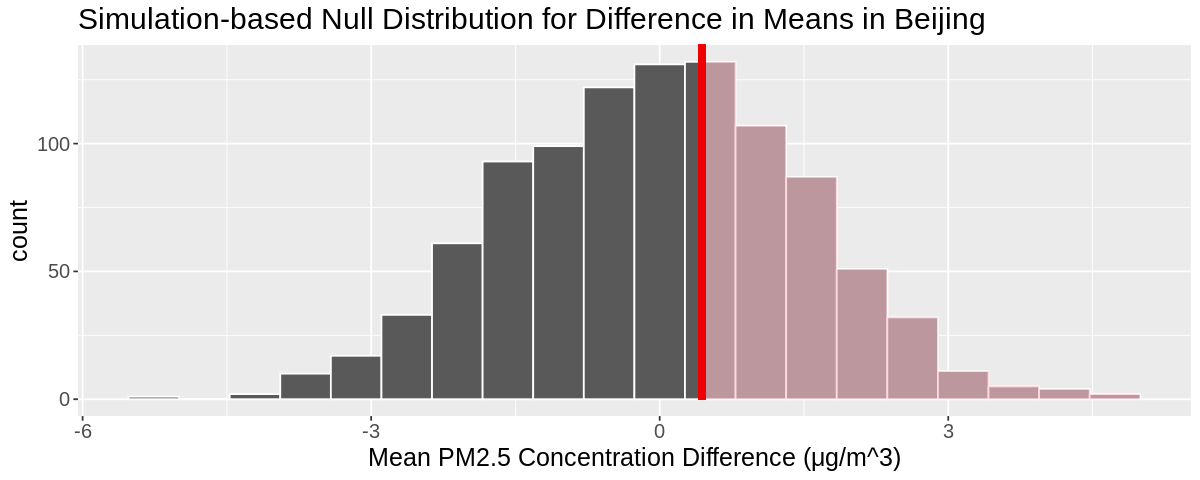

Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


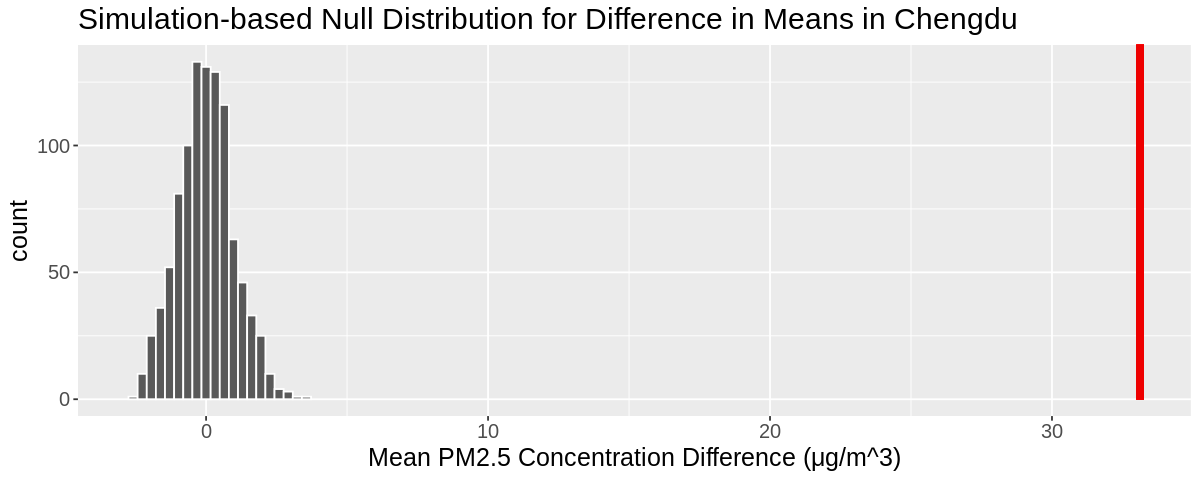

Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


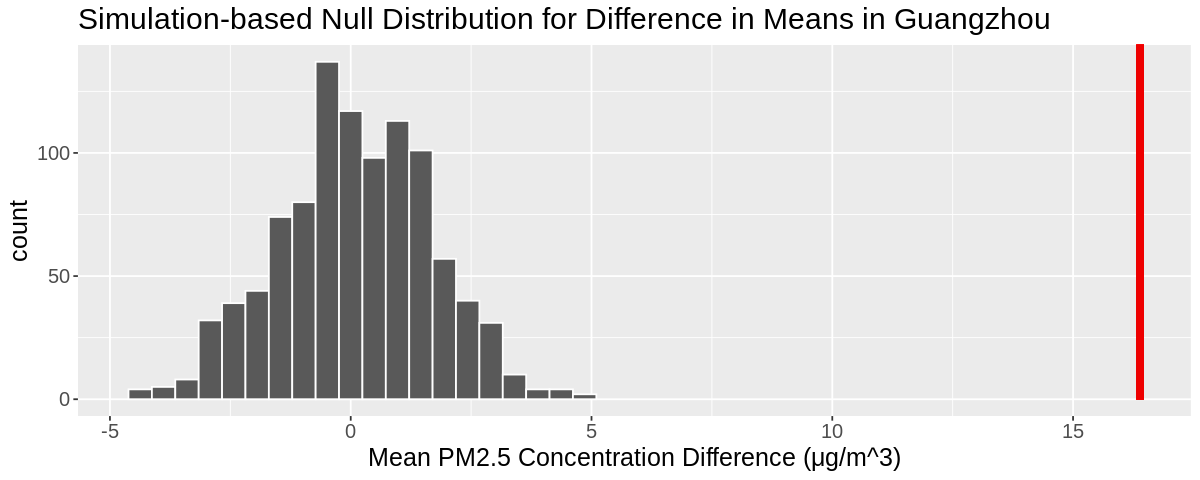

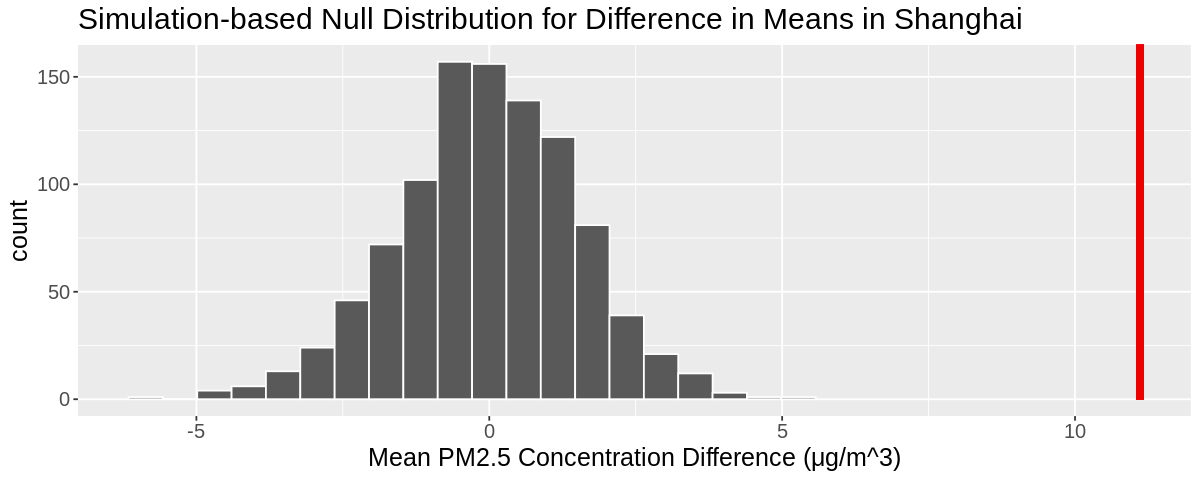

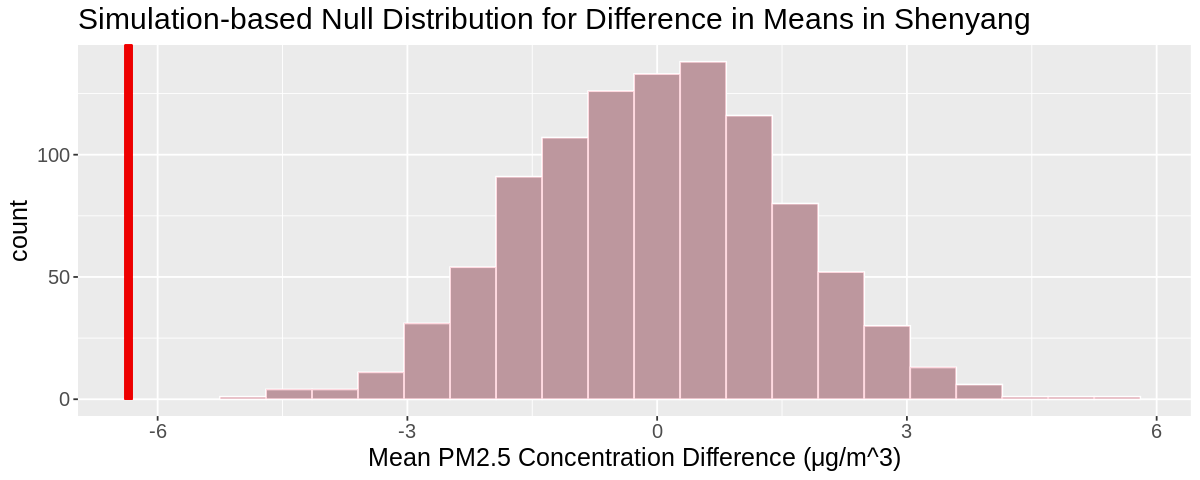

In [28]:
options(repr.plot.width = 10, repr.plot.height = 4)

BJ_null_diff_in_means_plot
CD_null_diff_in_means_plot
GZ_null_diff_in_means_plot
SH_null_diff_in_means_plot
SY_null_diff_in_means_plot

,stat
,<dbl>
1,-11.112893
2,-9.428873
3,-11.938796
4,-9.616647
5,-13.418079
6,-7.196432


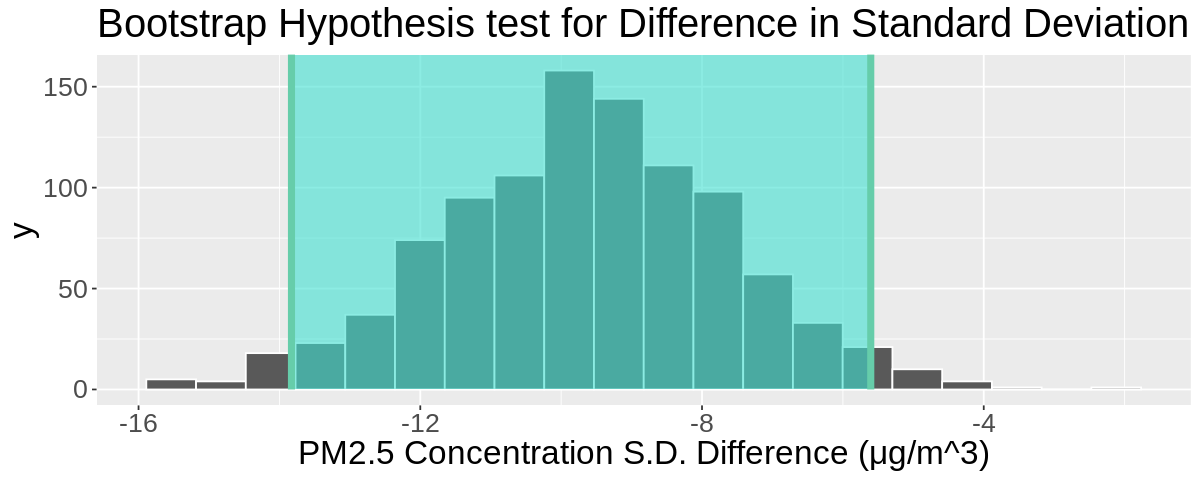

In [14]:
options(repr.plot.width = 10, repr.plot.height = 4)
# Set seed for consistent results
set.seed(46201)

# _________________________________________________
## BEIJING 
# Bootstrap samples for standard deviations
BJ_boot_diff_in_sd_2013 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2013) %>%
    select(PM_2.5_AV, year) %>% 
    specify(response = PM_2.5_AV) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "sd")
# head(BJ_boot_diff_in_sd_2013) 
BJ_boot_diff_in_sd_2015 <- total_PM2.5_AV %>% 
    filter(location == "Beijing", year == 2015) %>%
    select(PM_2.5_AV, year) %>% 
    specify(response = PM_2.5_AV) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "sd")
# head(BJ_boot_diff_in_sd_2015) 

# Merging samples together to obtain estimation of bootstrap samples for standard deviation differences in Beijing
BJ_boot_diff_in_sd <- merge(BJ_boot_diff_in_sd_2013, BJ_boot_diff_in_sd_2015, by = "replicate") %>% 
    mutate(stat = stat.x - stat.y) %>% 
    select(stat)
head(BJ_boot_diff_in_sd)

# 95% confidence interval obtained from BJ_boot_diff_in_sd
BJ_boot_diff_in_sd_ci <- BJ_boot_diff_in_sd %>%
    get_confidence_interval(level = 0.95, type = "percentile")
# BJ_boot_diff_in_sd_ci

# Plot of bootstrap hypothesis test with 95% confidence interval
BJ_boot_diff_in_sd_plot <- BJ_boot_diff_in_sd %>%
    ggplot() + 
    geom_histogram(aes(stat), bins = 20, color="white") +
    # shade_p_value(obs_stat = BJ_obs_diff_in_means, direction = "greater") + 
    ggtitle("Bootstrap Hypothesis test for Difference in Standard Deviation") + 
    xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
    # geom_line(data = BJ_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    shade_confidence_interval(endpoints = BJ_boot_diff_in_sd_ci) + 
    theme(text = element_text(size=20))
BJ_boot_diff_in_sd_plot

# _________________________________________________
## CHENGDU 


# _________________________________________________
## GUANGZHOU 


# _________________________________________________
## SHANGHAI 


# _________________________________________________
## SHENYANG 


In [15]:
# Set seed for consistent results
set.seed(46201)

# MAY NEED TO DELETE THIS SECTION

# # _________________________________________________
# ## BEIJING
# # Null distribution for standard deviations in Beijing (2013, 2015)
# BJ_null_diff_in_sd_2013 <- total_PM2.5_AV %>% 
#     filter(location == "Beijing", year == 2013) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# BJ_null_diff_in_sd_2015 <- total_PM2.5_AV %>% 
#     filter(location == "Beijing", year == 2015) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# # Merging samples together to obtain estimation of null distribution for standard deviation differences in Beijing
# BJ_null_diff_in_sd <- merge(BJ_null_diff_in_sd_2013, BJ_null_diff_in_sd_2015, by = "replicate") %>% 
#     mutate(stat = stat.x - stat.y) %>% 
#     select(stat)
# # head(BJ_null_diff_in_sd)

# # p-value for hypothesis test
# BJ_null_diff_in_sd_p <- BJ_null_diff_in_sd %>% 
#    get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_sd_diff_pt_est[1], direction = "two-sided")

# # Visualize null distribution and shade the p-value
# # Put vertical bar for the observed test statistic 
# BJ_null_diff_in_sd_plot <- BJ_null_diff_in_sd %>%
#     visualize(bins = 20) + 
#     shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[1], direction = "two-sided") +
#     ggtitle("Simulation-based Null Distribution for Difference in S.D. in Beijing") + 
#     xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
#     theme(text = element_text(size = 15))
# # BJ_null_diff_in_sd_plot

# # _________________________________________________
# ## CHENGDU
# # Null distribution for standard deviations in Beijing (2013, 2015)
# CD_null_diff_in_sd_2013 <- total_PM2.5_AV %>% 
#     filter(location == "Chengdu", year == 2013) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# CD_null_diff_in_sd_2015 <- total_PM2.5_AV %>% 
#     filter(location == "Chengdu", year == 2015) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# # Merging samples together to obtain estimation of null distribution for standard deviation differences in Chengdu
# CD_null_diff_in_sd <- merge(CD_null_diff_in_sd_2013, CD_null_diff_in_sd_2015, by = "replicate") %>% 
#     mutate(stat = stat.x - stat.y) %>% 
#     select(stat)
# # head(CD_null_diff_in_sd)

# # p-value for hypothesis test
# CD_null_diff_in_sd_p <- CD_null_diff_in_sd %>% 
#    get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_sd_diff_pt_est[2], direction = "two-sided")

# # Visualize null distribution and shade the p-value
# # Put vertical bar for the observed test statistic 
# CD_null_diff_in_means_plot <- CD_null_diff_in_means %>%
#     visualize(bins = 20) + 
#     shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[2], direction = "two-sided") +
#     ggtitle("Simulation-based Null Distribution for Difference in S.D. in Chengdu") + 
#     xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
#     theme(text = element_text(size = 15))
# # CD_null_diff_in_means_plot

# # _________________________________________________
# ## GUANGZHOU
# # Null distribution for standard deviations in Guangzhou (2013, 2015)
# GZ_null_diff_in_sd_2013 <- total_PM2.5_AV %>% 
#     filter(location == "Guangzhou", year == 2013) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# GZ_null_diff_in_sd_2015 <- total_PM2.5_AV %>% 
#     filter(location == "Guangzhou", year == 2015) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# # Merging samples together to obtain estimation of null distribution for standard deviation differences in Guangzhou
# GZ_null_diff_in_sd <- merge(GZ_null_diff_in_sd_2013, GZ_null_diff_in_sd_2015, by = "replicate") %>% 
#     mutate(stat = stat.x - stat.y) %>% 
#     select(stat)
# # head(CD_null_diff_in_sd)

# # p-value for hypothesis test
# GZ_null_diff_in_sd_p <- GZ_null_diff_in_sd %>% 
#    get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_sd_diff_pt_est[3], direction = "two-sided")

# # Visualize null distribution and shade the p-value
# # Put vertical bar for the observed test statistic 
# GZ_null_diff_in_means_plot <- GZ_null_diff_in_means %>%
#     visualize(bins = 20) + 
#     shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[3], direction = "two-sided") +
#     ggtitle("Simulation-based Null Distribution for Difference in S.D. in Guangzhou") + 
#     xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
#     theme(text = element_text(size = 15))
# # GZ_null_diff_in_means_plot

# # _________________________________________________
# ## SHANGHAI
# # Null distribution for standard deviations in Shanghai (2013, 2015)
# SH_null_diff_in_sd_2013 <- total_PM2.5_AV %>% 
#     filter(location == "Shanghai", year == 2013) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# SH_null_diff_in_sd_2015 <- total_PM2.5_AV %>% 
#     filter(location == "Shanghai", year == 2015) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# # Merging samples together to obtain estimation of null distribution for standard deviation differences in Shanghai
# SH_null_diff_in_sd <- merge(SH_null_diff_in_sd_2013, SH_null_diff_in_sd_2015, by = "replicate") %>% 
#     mutate(stat = stat.x - stat.y) %>% 
#     select(stat)
# # head(CD_null_diff_in_sd)

# # p-value for hypothesis test
# SH_null_diff_in_sd_p <- SH_null_diff_in_sd %>% 
#    get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_sd_diff_pt_est[4], direction = "two-sided")

# # Visualize null distribution and shade the p-value
# # Put vertical bar for the observed test statistic 
# SH_null_diff_in_means_plot <- SH_null_diff_in_means %>%
#     visualize(bins = 20) + 
#     shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[4], direction = "two-sided") +
#     ggtitle("Simulation-based Null Distribution for Difference in S.D. in Shanghai") + 
#     xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
#     theme(text = element_text(size = 15))
# # SH_null_diff_in_means_plot

# # _________________________________________________
# ## SHENYANG
# # Null distribution for standard deviations in Guangzhou (2013, 2015)
# SY_null_diff_in_sd_2013 <- total_PM2.5_AV %>% 
#     filter(location == "Shenyang", year == 2013) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# SY_null_diff_in_sd_2015 <- total_PM2.5_AV %>% 
#     filter(location == "Shenyang", year == 2015) %>%
#     select(PM_2.5_AV, year) %>% 
#     specify(response = PM_2.5_AV) %>% 
#     generate(reps = 1000, type = "permute") %>% 
#     calculate(stat = "sd")

# # Merging samples together to obtain estimation of null distribution for standard deviation differences in Guangzhou
# SY_null_diff_in_sd <- merge(SY_null_diff_in_sd_2013, SY_null_diff_in_sd_2015, by = "replicate") %>% 
#     mutate(stat = stat.x - stat.y) %>% 
#     select(stat)
# # head(CD_null_diff_in_sd)

# # p-value for hypothesis test
# SY_null_diff_in_sd_p <- SY_null_diff_in_sd %>% 
#    get_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_sd_diff_pt_est[5], direction = "two-sided")

# # Visualize null distribution and shade the p-value
# # Put vertical bar for the observed test statistic 
# SY_null_diff_in_means_plot <- SY_null_diff_in_means %>%
#     visualize(bins = 20) + 
#     shade_p_value(obs_stat = total_PM2.5_AV_mean_diff_obs$PM2.5_mean_diff_pt_est[5], direction = "two-sided") +
#     ggtitle("Simulation-based Null Distribution for Difference in S.D. in Shenyang") + 
#     xlab("PM2.5 Concentration S.D. Difference (μg/m^3)") + 
#     theme(text = element_text(size = 15))
# # GZ_null_diff_in_means_plot

In [16]:

# BJ_ftest_diff_in_sd <- 

## 4. Discussion and Conclusion


The study has the potential to address key questions that could help shape future policy decisions, including:
- How can policymakers create more effective policies to improve air quality in China?
- In what ways can policymakers continue to improve air quality, given the success or failure of current policies?
- Can the policies implemented in China be scaled and replicated in other cities or countries?

## References

<!-- - Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236 doi:10.1002/2016JD024877 -->
- Liang, X. (2016). PM 2.5 data reliability, consistency, and air quality assessment in five chinese cities CONSISTENCY IN CHINA'S PM 2.5 DATA doi:10.1002/2016JD024877
- “California Air Resources Board.” Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=For%20PM2.,symptoms%2C%20and%20restricted%20activity%20days.
- Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E. (2015). China's energy crossroads: Forging a new energy and environmental balance. Project Muse. 
- Non Normal Distribution. Statistics How To. (2023, February 8). Retrieved March 29, 2023, from https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/ 